# Analyzing Video Game Sales Data

## College of Computer Science and Engineering (CCSE)

### DSC307-Project Data Science in Research

#### Course project  

# """
**Introduction:**

The video game industry has seen remarkable growth over the years, becoming a multi-billion dollar global market. The availability of data on video game sales provides a unique opportunity to gain insights into player preferences, market trends, and the evolution of the industry
The world of video games is a vast and dynamic industry that has captivated millions of players and generated billions of dollars in revenue over the years. With the advancement of technology and the emergence of various gaming platforms, understanding the trends and patterns within the video game market has become increasingly important.


**Data Description:**

The dataset contains information about video game sales, including attributes like 'Name,' 'Platform,' 'Year of Release,' 'Genre,' 'Publisher,' and 'Global Sales.' It comprises [insert number] records, making it a comprehensive source of information for analysis.

We will perform data cleaning, exploratory data analysis, and potentially machine learning techniques to gain insights into video game sales trends and factors influencing success.
"""
Project Objectives

The objectives of this project are as follows:

- Analyze and explore the "Video Game Sales" dataset.
- Provide a comprehensive data description, including the number of rows and columns.
- Perform data cleaning and preprocessing to ensure data quality.
- Visualize key trends and patterns in video game sales data.
- Extract insights into the most popular platforms, genres, and sales trends.
- Formulate conclusions based on the analysis.

Throughout this project, we will employ various data analysis and visualization techniques to extract meaningful information from the dataset. We will also

Dataset Overview

- Source: Kaggle's "Video Game Sales" dataset
- URL:(https://www.kaggle.com/datasets/gregorut/videogamesales)
- Number of Rows: [16598]
- Number of Columns: [11]

So, let's embark on this journey to uncover the secrets hidden within the world of video game sales data!

###### Import libraries that will be used in the implementation

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor



###### **Data Loading**

In [ ]:
# Load the dataset
df = pd.read_csv('vgsales.csv')
df.columns= df.columns .str.capitalize()
df


,Rank,Name,Platform,Year,Genre,Publisher,Na_sales,Eu_sales,Jp_sales,Other_sales,Global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# data exploration:

###### Print some information about the dataframe such as columns names and data types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   Na_sales      16598 non-null  float64
 7   Eu_sales      16598 non-null  float64
 8   Jp_sales      16598 non-null  float64
 9   Other_sales   16598 non-null  float64
 10  Global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


###### Print the shape of the dataframe:

In [ ]:
df.shape

(16598, 11)

###### Print the types of the dataframe:

In [ ]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
Na_sales        float64
Eu_sales        float64
Jp_sales        float64
Other_sales     float64
Global_sales    float64
dtype: object

We calculate and print summary statistics for numerical columns using df.describe(). This includes measures such as mean, standard deviation, minimum, maximum, and quartiles.

In [ ]:
df.describe()

,Rank,Year,Na_sales,Eu_sales,Jp_sales,Other_sales,Global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [ ]:
df.tail

<bound method NDFrame.tail of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  Na_sales  Eu_sales  Jp_sales

# data cleaning and  Preprocessing:

###### We checked the missing values in each column in 2 different ways by counting the missing values and plotting them.

 We use df.isnull().sum() to check for missing values in each column and display the counts of missing values.

In [ ]:
# Data Cleaning
# Handle missing values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
Na_sales          0
Eu_sales          0
Jp_sales          0
Other_sales       0
Global_sales      0
dtype: int64

plotting missing values:

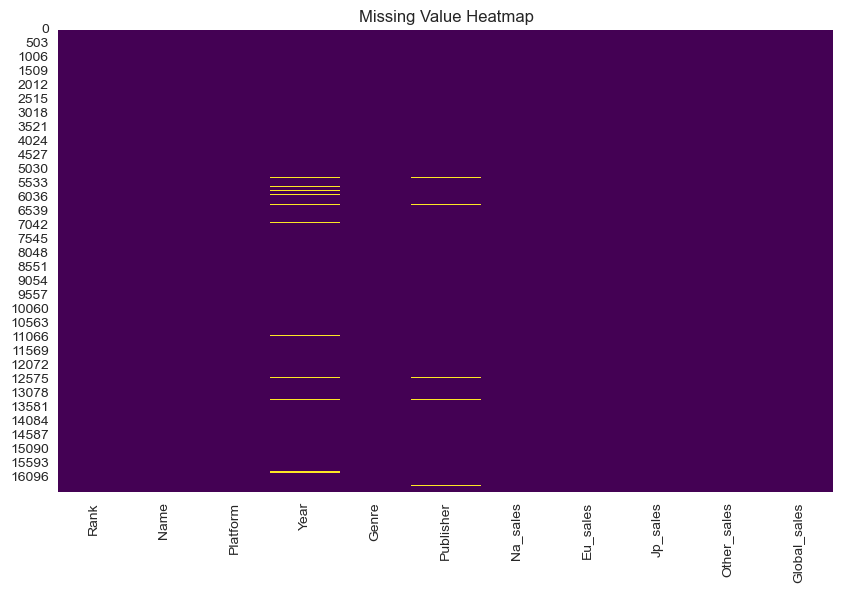

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

###### Drop the missing values

In [ ]:
print(df.shape)
df = df.dropna()
print(df.shape)


(16598, 11)
(16291, 11)


###### check after dropping

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Na_sales        0
Eu_sales        0
Jp_sales        0
Other_sales     0
Global_sales    0
dtype: int64

In [ ]:
df=df.fillna("NAN")

###### We print the columns with missing values and the count of missing values.

In [ ]:
# Print columns with missing values and the count of missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:


NameError: name 'missing_values' is not defined

###### We choose to handle missing values by dropping rows with missing values using data.dropna(inplace=True).

In [ ]:
# Handle missing values (you can choose your preferred method)
# Example: Drop rows with missing values
df.dropna(inplace=True)

###### Finally, we verify that there are no more missing values.

In [ ]:
# Verify that there are no more missing values
missing_values_after_handling = df.isnull().sum()
print("\nColumns with Missing Values after Handling:")
print(missing_values_after_handling[missing_values_after_handling > 0])


Columns with Missing Values after Handling:
Series([], dtype: int64)


# data pre-processing

###### check duplicates

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
duplicates = df.duplicated().sum()

In [ ]:
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
0


In [ ]:
# Step 6: Splitting Data into Features (X) and Target (y)
# Example: If you're doing regression, X might be all features except 'global_sales' and y is 'global_sales'
X = df.drop('global_sales', axis=1)
y = df['global_sales']
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Continue with further data preprocessing steps as needed for your specific analysis.

# Optionally, save the preprocessed data to a new file
df.to_csv('preprocessed_vgsales.csv', index=False)
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


###### Data Visualizations

In [ ]:
df['genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: genre, dtype: int64

We create three types of visualizations to explore the data:

###### A bar chart showing global sales by platform.

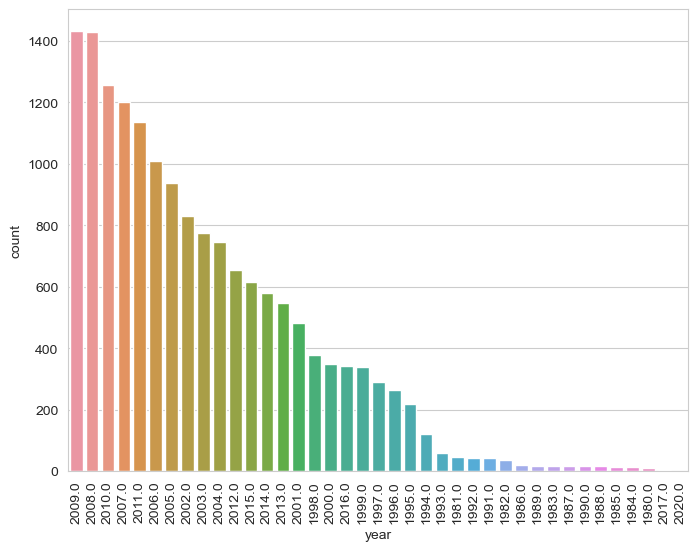

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="year", data=df, order = df.groupby(by=['year'])['name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

###### A bar chart showing global sales by genre.

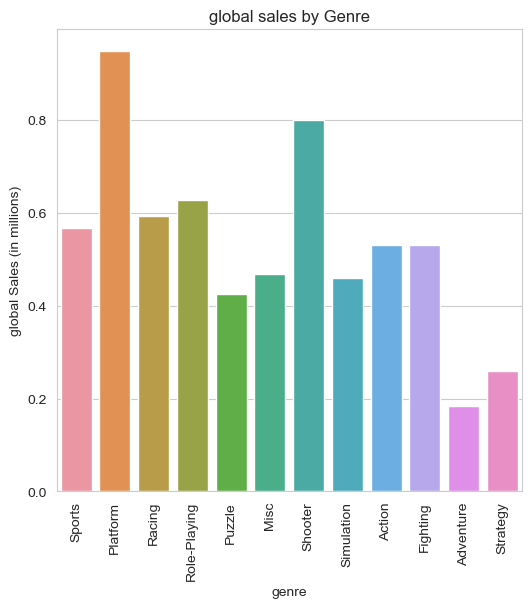

In [ ]:
# Data visualization: Sales by Genre
plt.figure(figsize=(6, 6))
sns.barplot(x='genre', y='global_sales', data=df, ci=None)
plt.title('global sales by Genre')
plt.xlabel('genre')
plt.ylabel('global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

###### A line plot showing yearly global sales trends.

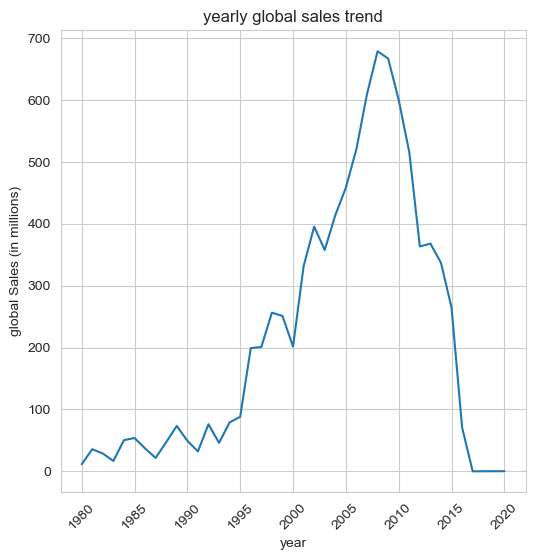

In [ ]:
# Data visualization: Yearly Sales trends
yearly_sales = df.groupby('year')['global_sales'].sum().reset_index()
plt.figure(figsize=(6, 6))
sns.lineplot(x='year', y='global_sales', data=yearly_sales)
plt.title('yearly global sales trend')
plt.xlabel('year')
plt.ylabel('global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

These visualizations provide insights into which platforms, genres, and years have the highest global sales.

You can adapt and extend this code based on your specific research questions and analysis goals. These initial steps provide a foundation for more in-depth analysis and insights into the dataset.

###### ML algorithm implementation

Implementing a machine learning algorithm typically involves several steps, including data preprocessing, model selection, training, evaluation, and prediction. Below, I'll provide a simplified example of implementing a machine learning algorithm using Python's scikit-learn library. We'll use a basic algorithm like Linear Regression for illustration. Please note that real-world ML projects often involve more complex steps and various algorithms.

In [ ]:
X = df[['na_sales', 'year' , 'rank']]#choose feature
y = df['global_sales']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
model = LinearRegression()

In [ ]:
# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
# Now, you can use the trained model to make predictions on new data.

Mean Squared Error: 0.63
R-squared (R2) Score: 0.82
